In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from univarfem import IntervalMesh, PoissonFEMSolver

# Poisson problem

We first consider the simple Poisson problem with constant source

$$
\begin{align}
    &-\frac{d^2 u(x)}{dx^2} = c, \qquad x \in (0, 1) \\
    &u(0) = u(1) = 0
\end{align}
$$

### Defining the Problem

We construct a mesh of the unit interval

In [11]:
 # points defining the mesh
points = np.linspace(0., 1., 5)

# create the mesh
mesh = IntervalMesh(points)

# source function

c = 10 # constant source
def source(x):
    return c

# define the problem
fem = PoissonFEMSolver(mesh, source)

### Assembly
To obtain the solution we need to construct the stiffness matrix `A` and the load vector `f`. This is done by calling the `assemble` method.

In [12]:
A, f = fem.assemble()

u = np.linalg.solve(A, f)

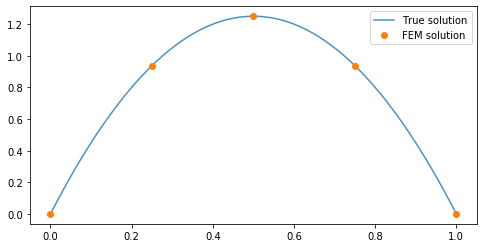

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))

# dense points for plotting
xx = np.linspace(0., 1., 100)
ax.plot(xx, .5*c*xx*(1-xx), 'C0-', alpha=0.8,
        label='True solution')

ax.plot(points, u, 'C1o',
        label='FEM solution')

ax.legend()
plt.show()